## Mikroserwis

W eksperymencie A/B mikroserwis losowo wybiera wariant modelu:

- **A (baseline)** – model bazowy
- **B (target)** – model docelowy

Zdarzenia są zapisywane w logu (JSONL):
- `predict`: `request_id`, `variant`, `prob`
- `feedback`: `request_id`, `true`

Notatnik:
1) wczytuje log i łączy `predict` z `feedback` po `request_id`,
2) definiuje miarę jakości na poziomie pojedynczego zapytania,
3) stawia hipotezy i weryfikuje je testem t-Studenta (jednostronnym),
4) podaje decyzję „czy B jest istotnie lepsze od A”.


#### Przykładowe wywołanie mikroserwisu

Poniżej przykład requestu. W praktyce wypełnij `features` cechami zgodnymi ze schematem wejścia mikroserwisu.


In [1]:
import requests

URL = "http://127.0.0.1:8000/predict"

payload = {
  "user_id": "180678666",
  "listing_id": "37494274",
  "features": {
    "accommodates": 2.0,
    "bedrooms": 1.0,
    "beds": 1.0,
    "bathrooms": 1.0,
    "minimum_nights": 2.0,
    "maximum_nights": 152.0,
    "amenities_count": 47,
    "room_type": "Private room",
    "amen_hot_water": 1,
    "amen_kitchen": 1,
    "amen_hair_dryer": 1,
    "amen_essentials": 1,
    "amen_dishes_and_silverware": 1,
    "amen_hangers": 1,
    "amen_wifi": 1,
    "amen_iron": 1,
    "amen_bed_linens": 0,
    "amen_microwave": 1,
    "amen_cooking_basics": 1,
    "amen_refrigerator": 1,
    "amen_shampoo": 1,
    "amen_heating": 1,
    "amen_coffee_maker": 1,
    "amen_dedicated_workspace": 1,
    "amen_long_term_stays_allowed": 0,
    "amen_room_darkening_shades": 1,
    "amen_elevator": 1,
    "amen_tv": 0,
    "amen_shower_gel": 1,
    "amen_freezer": 1,
    "amen_cleaning_products": 1,
    "amen_toaster": 0,
    "amen_extra_pillows_and_blankets": 1,
    "amen_hot_water_kettle": 0,
    "amen_drying_rack_for_clothing": 1,
    "amen_body_soap": 1,
    "amen_dining_table": 1,
    "amen_washer": 0,
    "amen_fire_extinguisher": 0,
    "amen_air_conditioning": 0,
    "amen_oven": 1,
    "amen_wine_glasses": 1,
    "amen_self_check_in": 0,
    "amen_stove": 0,
    "amen_dishwasher": 1,
    "amen_host_greets_you": 1,
    "amen_first_aid_kit": 0,
    "amen_smoke_alarm": 0,
    "amen_free_washer_in_unit": 1,
    "amen_clothing_storage_closet": 1,
    "amen_laundromat_nearby": 0,
    "amen_coffee": 1,
    "amen_luggage_dropoff_allowed": 1,
    "amen_carbon_monoxide_alarm": 0,
    "amen_paid_parking_off_premises": 0,
    "amen_ac_split_type_ductless_system": 0,
    "amen_private_patio_or_balcony": 0,
    "amen_private_entrance": 0,
    "amen_crib": 0,
    "amen_lockbox": 0,
    "amen_single_level_home": 0,
    "amen_city_skyline_view": 1,
    "amen_pets_allowed": 0,
    "amen_portable_fans": 0,
    "amen_clothing_storage": 0,
    "amen_smart_lock": 0,
    "amen_ethernet_connection": 0,
    "amen_books_and_reading_material": 0,
    "amen_blender": 1,
    "amen_bathtub": 1,
    "amen_free_street_parking": 0,
    "amen_central_air_conditioning": 1,
    "amen_paid_parking_on_premises": 0,
    "amen_pack_n_play_travel_crib": 0,
    "amen_central_heating": 0,
    "amen_conditioner": 0,
    "amen_coffee_maker_nespresso": 0,
    "amen_patio_or_balcony": 0,
    "amen_pocket_wifi": 0,
    "amen_electric_stove": 0,
    "amen_lock_on_bedroom_door": 0,
    "amen_exterior_security_cameras_on_property": 0,
    "amen_dryer": 0,
    "amen_paid_parking_garage_off_premises": 0,
    "amen_mini_fridge": 0,
    "amen_heating_split_type_ductless_system": 0,
    "amen_free_dryer_in_unit": 0,
    "amen_ceiling_fan": 0,
    "amen_smoking_allowed": 1,
    "amen_bidet": 0,
    "amen_tv_with_standard_cable": 1,
    "amen_high_chair": 0,
    "amen_baking_sheet": 1,
    "amen_cleaning_available_during_stay": 0,
    "amen_outdoor_furniture": 1,
    "amen_crib_available_upon_request": 0,
    "amen_courtyard_view": 0,
    "amen_children_s_dinnerware": 0,
    "amen_breakfast": 0,
    "amen_babysitter_recommendations": 0,
    "amen_paid_street_parking_off_premises": 0,
    "amen_free_parking_on_premises": 0,
    "amen_radiant_heating": 0,
    "amen_window_guards": 0,
    "amen_coffee_maker_espresso_machine": 0,
    "amen_children_s_books_and_toys": 0,
    "amen_portable_heater": 0,
    "amen_outdoor_dining_area": 1,
    "amen_keypad": 0,
    "amen_building_staff": 0,
    "amen_paid_crib_available_upon_request": 0,
    "amen_shared_patio_or_balcony": 1,
    "amen_clothing_storage_closet_and_dresser": 0,
    "amen_coffee_maker_pour_over_coffee": 0,
    "amen_induction_stove": 0,
    "amen_coffee_maker_drip_coffee_maker": 0,
    "amen_backyard": 0,
    "amen_window_ac_unit": 1,
    "amen_safe": 0,
    "amen_stainless_steel_oven": 0,
    "amen_pack_n_play_travel_crib_available_upon_request": 0,
    "amen_board_games": 0,
    "amen_paid_parking_lot_off_premises": 0,
    "amen_noise_decibel_monitors_on_property": 0,
    "amen_portable_air_conditioning": 1,
    "amen_clothing_storage_wardrobe": 0,
    "amen_hdtv": 0,
    "amen_baby_bath": 0,
    "amen_outdoor_shower": 0,
    "amen_private_backyard_fully_fenced": 0,
    "amen_park_view": 1,
    "amen_garden_view": 0,
    "amen_clothing_storage_closet_and_wardrobe": 0,
    "amen_sound_system": 0,
    "amen_outlet_covers": 0,
    "amen_trash_compactor": 0,
    "amen_paid_washer_in_unit": 0,
    "amen_32_inch_hdtv": 0,
    "amen_folding_or_convertible_high_chair_available_upon_request": 0,
    "amen_other_electric_stove": 0,
    "amen_private_living_room": 0,
    "amen_mosquito_net": 0,
    "amen_exercise_equipment": 0,
    "amen_paid_pack_n_play_travel_crib_available_upon_request": 0,
    "amen_outdoor_playground": 0,
    "amen_32_inch_hdtv_with_standard_cable": 0,
    "amen_rice_maker": 0,
    "amen_arcade_games": 0,
    "amen_indoor_fireplace": 0,
    "amen_free_washer_in_building": 0,
    "amen_shared_backyard_fully_fenced": 0,
    "amen_clothing_storage_dresser": 0,
    "amen_mountain_view": 1,
    "amen_hdtv_with_standard_cable": 0,
    "amen_changing_table": 0,
    "amen_other_induction_stove": 0,
    "amen_55_inch_hdtv": 0,
    "amen_pool": 0,
    "amen_hdtv_with_netflix": 0,
    "amen_bikes": 0,
    "amen_estandar_body_soap": 0,
    "amen_washer_in_unit": 0,
    "amen_barbecue_utensils": 0,
    "amen_stainless_steel_electric_stove": 0,
    "amen_pack_n_play_travel_crib_always_at_the_listing": 0,
    "amen_sun_loungers": 0,
    "amen_clothing_storage_walk_in_closet": 0,
    "amen_table_corner_guards": 0,
    "amen_free_washer": 0,
    "amen_high_chair_available_upon_request": 0,
    "amen_40_inch_hdtv": 0,
    "amen_clothing_storage_closet_wardrobe_and_dresser": 0,
    "amen_shared_pool": 0,
    "amen_bread_maker": 0,
    "amen_bluetooth_sound_system": 0,
    "amen_coffee_maker_nespresso_pour_over_coffee": 0,
    "amen_baby_safety_gates": 0,
    "amen_paid_parking_garage_on_premises": 0,
    "amen_crib_always_at_the_listing": 0,
    "amen_housekeeping_available_at_extra_cost": 0,
    "amen_bbq_grill": 0,
    "amen_shared_backyard": 0,
    "amen_stainless_steel_induction_stove": 1,
    "amen_free_parking_garage_on_premises_1_space": 0,
    "amen_baby_bath_available_upon_request": 0,
    "amen_hammock": 0,
    "amen_shared_gym_nearby": 0,
    "amen_paid_clamp_on_table_seat_high_chair_available_upon_request": 0,
    "amen_clamp_on_table_seat_high_chair_available_upon_request": 0,
    "amen_coffee_maker_drip_coffee_maker_nespresso": 0,
    "amen_gym": 0,
    "amen_55_inch_hdtv_with_standard_cable": 0,
    "amen_40_inch_hdtv_with_standard_cable": 0,
    "amen_private_hot_tub": 0,
    "amen_coffee_maker_french_press": 0,
    "amen_teka_electric_stove": 0,
    "amen_single_oven": 0,
    "amen_42_inch_hdtv": 0,
    "amen_clothing_storage_wardrobe_and_dresser": 0,
    "amen_45_inch_tv_with_standard_cable": 0,
    "amen_standalone_high_chair_available_upon_request": 0,
    "amen_stainless_steel_single_oven": 0,
    "amen_mercadona_body_soap": 0,
    "amen_clothing_storage_walk_in_closet_and_closet": 0,
    "amen_tv_with_netflix": 0,
    "amen_kitchenette": 0,
    "amen_paid_washer": 0,
    "amen_32_inch_tv": 0
  }
}

# response = requests.post(URL, json=payload, timeout=10)
# print(response.status_code, response.json())


### Oznaczenia

W analizie porównujemy średnią wartość miary jakości w dwóch wariantach. Ponieważ problem jest klasyfikacją binarną z prawdopodobieństwem `prob = P(y=1)`,
stosujemy miarę zdefiniowaną **dla pojedynczego zapytania** (pojedynczej próbki).

Użyta miara (per-request):
- **logloss**:  $(\ell = -[y\log(p) + (1-y)\log(1-p)])$  (mniej = lepiej)

W dalszej części:
- $(q_A)$ – średni logloss wariantu A
- $(q_B)$ – średni logloss wariantu B
- $(\Delta = q_A - q_B)$ – obserwowana poprawa (jeśli dodatnia, B ma mniejszy logloss)


### Hipotezy

Chcemy sprawdzić, czy wariant **B** jest lepszy (ma mniejszy logloss) od wariantu **A**.

- Hipoteza zerowa $(H_0): (q_B \ge q_A)$  (B nie jest lepsze od A)
- Hipoteza alternatywna $(H_1): (q_B < q_A)$ (B jest lepsze od A)

Równoważnie dla poprawy $(\Delta = q_A - q_B)$:
- $(H_0): (\Delta \le 0)$
- $(H_1): (\Delta > 0)$


### Przyjęte parametry

Ustalamy:
- poziom istotności $(\alpha)$,
- moc testu $(1-\beta)$,
- **MDE** (minimal detectable effect) – minimalna poprawa, która ma sens praktyczny.

Ponieważ miarą jest logloss, MDE interpretujemy jako minimalny spadek średniego logloss.
W notatniku MDE ustawiamy jako ułamek średniego logloss wariantu A (np. 2%).


In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_ind

try:
    from src.utils.constants import AB_LOG_PATH
    LOG_PATH = Path(AB_LOG_PATH).resolve(strict=True)
except (ImportError, ModuleNotFoundError, FileNotFoundError):
    LOG_PATH = Path("../logs/ab_log.jsonl")

assert LOG_PATH.exists(), f"Missing log file: {LOG_PATH.resolve()}"

print("Using log:", LOG_PATH.resolve())

def load_jsonl(path: Path) -> pd.DataFrame:
    rows = []
    for i, line in enumerate(path.read_text(encoding="utf-8").splitlines(), start=1):
        line = line.strip()
        if not line:
            continue
        try:
            rows.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"[warn] invalid JSON on line {i}, skipping")
    return pd.DataFrame(rows)

df = load_jsonl(LOG_PATH)

pred = df.loc[df["event"] == "predict"].copy()
fb = df.loc[df["event"] == "feedback"].copy()

pred_keep = ["request_id", "variant", "prob"]
for c in ["ts", "model", "pred", "user_id", "listing_id"]:
    if c in pred.columns:
        pred_keep.append(c)
pred = pred[pred_keep].copy()

fb = fb[["request_id", "true"]].copy()

need_pred = {"request_id", "variant", "prob"}
need_fb = {"request_id", "true"}
assert need_pred.issubset(pred.columns), f"predict missing: {sorted(need_pred - set(pred.columns))}"
assert need_fb.issubset(fb.columns), f"feedback missing: {sorted(need_fb - set(fb.columns))}"

m = pred.merge(fb, on="request_id", how="inner", validate="1:1")

m = m.rename(columns={"true": "y_true", "prob": "p"})
m["y_true"] = m["y_true"].astype(int)
m["p"] = m["p"].astype(float)


Using log: /mnt/SSD/Projects/ium/logs/ab_log.jsonl


### Obliczenie miary jakości (logloss) dla pojedynczej próbki

W logu mamy prawdopodobieństwo `p` oraz etykietę `y_true`.
Wyliczamy `loss` dla każdej próbki i tworzymy dwie grupy: A oraz B.


In [2]:
EPS = 1e-15
p = np.clip(m["p"].to_numpy(), EPS, 1 - EPS)
y = m["y_true"].to_numpy()

m["loss"] = -(y * np.log(p) + (1 - y) * np.log(1 - p))

group_A = m.loc[m["variant"] == "A", "loss"].to_numpy()
group_B = m.loc[m["variant"] == "B", "loss"].to_numpy()

print(f"Number of samples: A: {len(group_A)}, B: {len(group_B)}, Total: {len(group_A) + len(group_B)}")
print(f"Mean logloss:      A: {np.mean(group_A):.6f}, B: {np.mean(group_B):.6f}")
print(f"Std dev logloss:   A: {np.std(group_A, ddof=1):.6f}, B: {np.std(group_B, ddof=1):.6f}")


Number of samples: A: 49967, B: 50033, Total: 100000
Mean logloss:      A: 0.459848, B: 0.214183
Std dev logloss:   A: 0.588351, B: 0.454773


### Dobór MDE na podstawie danych pilotowych

MDE ustawiamy jako względny spadek średniego logloss wariantu A.
Przykład: `mde_rel = 0.02` oznacza, że minimalnie interesuje nas poprawa o 2% średniego logloss wariantu A.


In [3]:
alpha = 0.05
power = 0.80

mde_rel = 0.02

mean_A = float(np.mean(group_A))
std_A = float(np.std(group_A, ddof=1))
std_B = float(np.std(group_B, ddof=1))

mde = mde_rel * mean_A
print(f"alpha={alpha}, power={power}")
print(f"pilot mean logloss A={mean_A:.6f}")
print(f"MDE (abs) = {mde:.6f}  (={mde_rel:.1%} of mean_A)")


alpha=0.05, power=0.8
pilot mean logloss A=0.459848
MDE (abs) = 0.009197  (=2.0% of mean_A)


### Wyznaczanie liczby potrzebnych próbek

Do oszacowania liczby próbek stosujemy test t dwóch niezależnych prób (warianty A i B).
Wykorzystujemy oszacowane odchylenie standardowe i przyjęte MDE.

Wynik `n_required` oznacza liczbę obserwacji **na wariant** (A oraz B), przy założeniu równych rozmiarów grup.


In [9]:
from statsmodels.stats.power import TTestIndPower  # type: ignore

std_pooled = float(np.sqrt((std_A**2 + std_B**2) / 2.0))
effect_size = mde / std_pooled if std_pooled > 0 else np.nan

n_required = None

analysis = TTestIndPower()
n_required = float(
    analysis.solve_power(
        effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative="larger"
    )
)
method = "statsmodels (TTestIndPower)"

print("Method:", method)
print(f"pooled std={std_pooled:.6f}, effect_size={effect_size:.6f}")
print(f"Estimated n per variant needed: {n_required:.1f}")
print(f"Total sample size: {2*n_required:.1f}")


Method: statsmodels (TTestIndPower)
pooled std=0.525821, effect_size=0.017491
Estimated n per variant needed: 40419.7
Total sample size: 80839.3


### Wyznaczanie wartości krytycznej dla poprawy Δ

Definiujemy poprawę:
$[
\Delta = q_A - q_B
]$
gdzie $(q_A)$ i $(q_B)$ to średni logloss.

Wartość krytyczna (przybliżenie normalne):
$[
\Delta_{crit} = z_{1-\alpha}\cdot SE
]$
gdzie
$[
SE = \sqrt{\frac{\sigma_A^2}{n} + \frac{\sigma_B^2}{n}}
]$
a $(n)$ to liczba obserwacji na wariant.


In [5]:
n = 1 if n_required is None else n_required

se = float(np.sqrt((std_A**2 / n) + (std_B**2 / n)))
z_crit = float(norm.ppf(1 - alpha))
delta_crit = float(z_crit * se)

print(f"Standard error (SE): {se:.6f}")
print(f"Critical z (1-alpha): {z_crit:.6f}")
print(f"Critical value (Delta_crit): {delta_crit:.6f} logloss")


Standard error (SE): 0.003699
Critical z (1-alpha): 1.644854
Critical value (Delta_crit): 0.006084 logloss


### Metodyka testu

Każde wywołanie mikroserwisu realizuje predykcję i zapisuje:
- wariant modelu A/B,
- prawdopodobieństwo `prob`.

Etykieta `true` jest dopisywana w osobnym zdarzeniu `feedback` (np. po poznaniu rzeczywistego wyniku).
Ewaluacja łączy te dwa zdarzenia po `request_id`.


### Wynik testu statystycznego

Warunki weryfikacji hipotezy:
1) dane są wystarczające: liczba oznaczonych obserwacji w A i B osiąga `n_required`,
2) obserwowana poprawa $(\Delta)$ jest co najmniej na poziomie MDE,
3) test t-Studenta (Welch) daje `p_value < alpha` dla hipotezy jednostronnej $(\Delta > 0)$.


In [7]:
data_sufficient = (len(group_A) >= n) and (len(group_B) >= n)

if data_sufficient:
    observed_delta = float(np.mean(group_A) - np.mean(group_B))
    se_obs = float(np.sqrt((np.var(group_A, ddof=1) / len(group_A)) + (np.var(group_B, ddof=1) / len(group_B))))
    delta_crit_obs = float(norm.ppf(1 - alpha) * se_obs)

    t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False, alternative="greater")
    p_one = float(p_value)

    stat_significant = p_one < alpha
    practical_significant = observed_delta >= mde

    print("--- Data reliability ---")
    print(f"Sample size reached: A={len(group_A)} B={len(group_B)} (Required per variant: {int(np.ceil(n))})")
    print(f"Observed improvement Δ = mean(A)-mean(B): {observed_delta:.6f} logloss")
    print(f"MDE: {mde:.6f} logloss")
    print(f"Critical value Δ_crit (based on observed SE): {delta_crit_obs:.6f} logloss")
    print("")
    print("--- Welch t-test (one-sided: mean(A) > mean(B)) ---")
    print(f"t_stat: {float(t_stat):.6f}")
    print(f"p_value (one-sided): {p_one:.6g}")
    print("")
    print("--- Decision ---")
    if stat_significant and practical_significant:
        print(f"Reject H0. Accept H1: B improves logloss (Δ={observed_delta:.6f}, p={p_one:.6g}).")
    elif not stat_significant:
        print(f"Do not reject H0: no statistical evidence that B is better (p={p_one:.6g}).")
    else:
        print(f"Do not reject H0: improvement < MDE (Δ={observed_delta:.6f} < {mde:.6f}).")
else:
    print(
        f"NOT sufficient data. Collected A={len(group_A)}/{int(np.ceil(n))}, "
        f"B={len(group_B)}/{int(np.ceil(n))} labeled samples."
    )


--- Data reliability ---
Sample size reached: A=49967 B=50033 (Required per variant: 40420)
Observed improvement Δ = mean(A)-mean(B): 0.245665 logloss
MDE: 0.009197 logloss
Critical value Δ_crit (based on observed SE): 0.005471 logloss

--- Welch t-test (one-sided: mean(A) > mean(B)) ---
t_stat: 73.865107
p_value (one-sided): 0

--- Decision ---
Reject H0. Accept H1: B improves logloss (Δ=0.245665, p=0).


#### Dodatkowa wizualizacja

Porównanie rozkładów logloss w wariantach A i B.


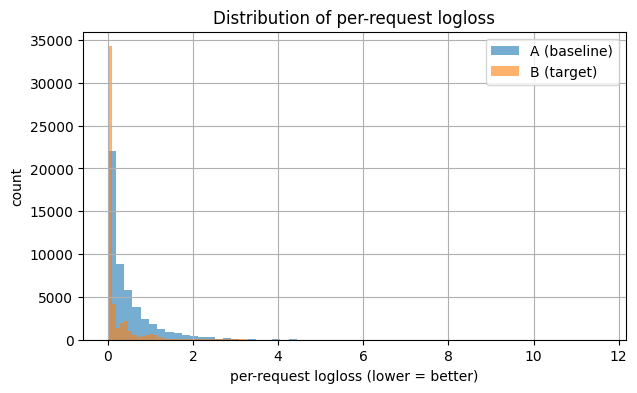

In [8]:
plt.figure(figsize=(7, 4))
plt.hist(group_A, bins=60, alpha=0.6, label="A (baseline)")
plt.hist(group_B, bins=60, alpha=0.6, label="B (target)")
plt.xlabel("per-request logloss (lower = better)")
plt.ylabel("count")
plt.title("Distribution of per-request logloss")
plt.legend()
plt.grid(True)
plt.show()


## Podsumowanie

- Miara jakości: logloss na poziomie pojedynczego zapytania.
- Hipotezy: $(H_0: q_B \ge q_A)$, $(H_1: q_B < q_A)$.
- MDE: względna poprawa logloss (parametr `mde_rel`).
- Weryfikacja: test t-Studenta (Welch), jednostronny.
- Decyzja: odrzucamy / nie odrzucamy $(H_0)$ w zależności od `p_value < alpha` oraz warunku praktycznego (MDE).
